# Wafflemaker

A series of examples from the waffle library shamelessly attempting to recreate examples from popular literature or similar libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wafflemaker

## A simple example

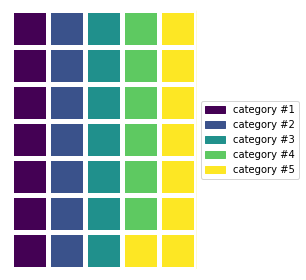

In [2]:
df = pd.DataFrame(dict(
    values=np.random.normal(1e6, 1e5, 5),
    categories=[f'category #{i}' for i in range(1, 6)],
))

wafflemaker.waffle(
    nrows=7,
    ncols=5,
    values='values',
    labels='categories',
    scale_to_dims=True,
    data=df,
)

## Scaling the data manually

If you choose not to autoscale data, you manually adjust rows/columns to get the appropriate shape. Inspiration from recreating a re-creation in the R based waffle library: https://github.com/hrbrmstr/waffle

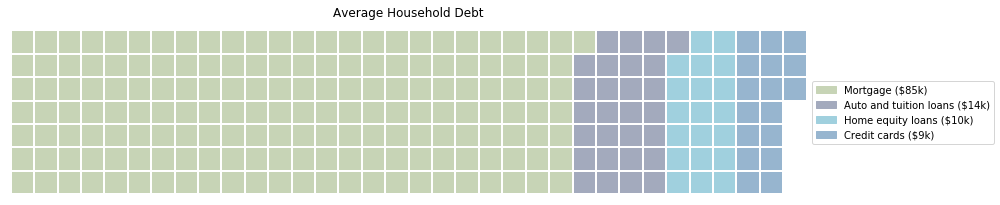

In [3]:
df = pd.DataFrame(dict(
    values=[84911, 14414, 10062, 8565],
    categories=[
        'Mortgage ($85k)', 
        'Auto and tuition loans ($14k)', 
        'Home equity loans ($10k)', 
        'Credit cards ($9k)'
    ],
    hues=["#c7d4b6", "#a3aabd", "#a0d0de", "#97b5cf"]
))

df['scaled_values'] = df['values'] / 500.

wafflemaker.waffle(
    nrows=7,
    values='scaled_values',
    labels='categories',
    hue='hues',
    scale_to_dims=False,
    data=df,
    grid_options=dict(linewidth=2),
    figure_options=dict(figsize=(14, 5)),
    title='Average Household Debt'
)

## Using icons instead of a grid

In [4]:
import matplotlib.font_manager as fm
import requests
import tempfile

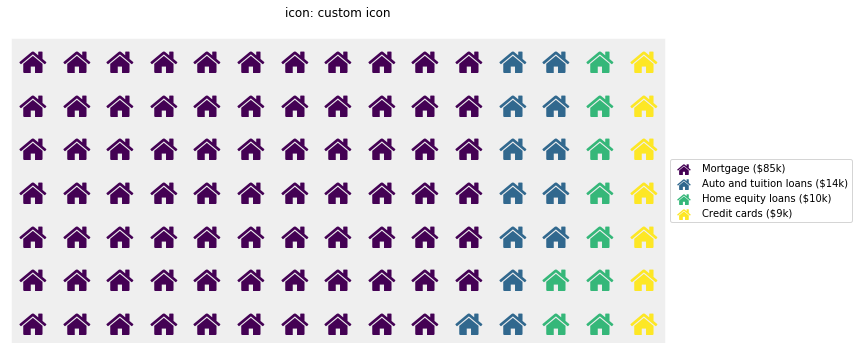

In [5]:
# get font and save to temp file
font_awesome_url = 'https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/fonts/fontawesome-webfont.ttf'
tf = tempfile.NamedTemporaryFile()
r = requests.get(font_awesome_url)
with open(tf.name, 'wb') as f:
    f.write(r.content)
    
# use font in waffle plot
prop = fm.FontProperties(fname=tf.name)

# build plot
wafflemaker.waffle(
        nrows=7, ncols=15,
        values='values', labels='categories', data=df,
        icon='\uf015',
        background_color='#efefef',
        icon_options=dict(fontproperties=prop, size=30),
        icon_legend_options=dict(size=15),
        grid_options=dict(color='#efefef', linewidth=15),
        figure_options=dict(figsize=(14, 5)),
        title='icon: custom icon'
    )

# delete temporary font
tf.close()

## Building a series of panels 


Based on two excellent exmaples from the economist and flowing data.

- https://www.economist.com/blogs/graphicdetail/2015/08/daily-chart-6
- http://flowingdata.com/2017/08/03/working-on-tips/  

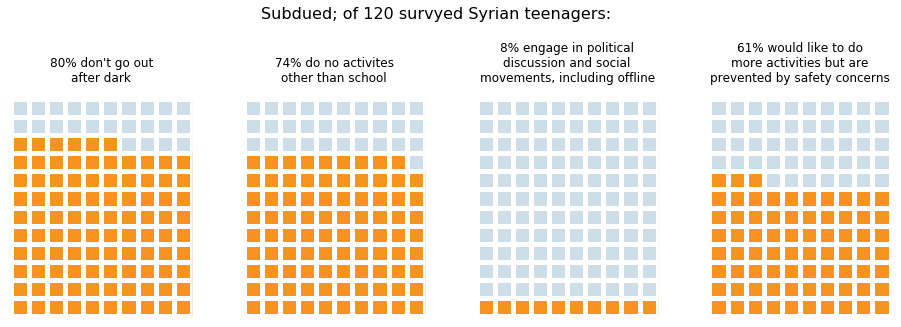

In [6]:
fractions = np.array([.80, .74, .08, .61])
positives = fractions * 120
negatives = 120 - positives
titles = [
    '80% don\'t go out\nafter dark',
    '74% do no activites\nother than school',
    '8% engage in political\ndiscussion and social\nmovements, including offline',
    '61% would like to do\nmore activities but are\nprevented by safety concerns',
]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle("Subdued; of 120 survyed Syrian teenagers:", y=1.2, fontsize=16)
for i, ax in enumerate(axes):
    wafflemaker.waffle(nrows=12, 
        ncols=10,
        values=[positives[i], negatives[i]],
        title=titles[i],
        hue=['#f7931e', '#cddee8'],
        fill_direction=wafflemaker.CellFillDirection.ByRow,
        ax=ax)


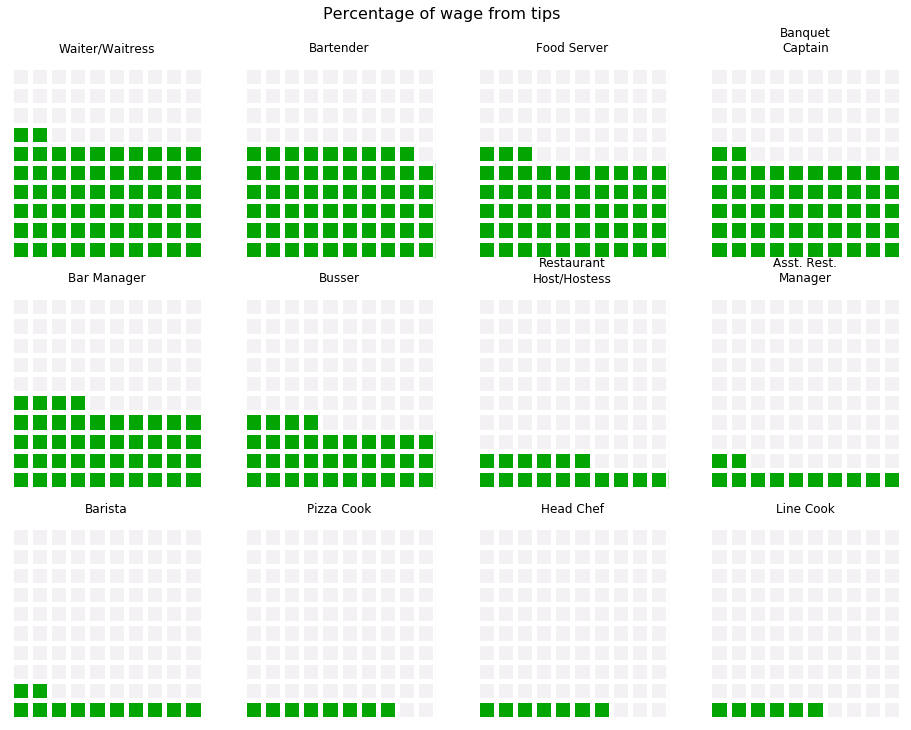

In [7]:
fractions = np.array([
    0.62, 0.59, 0.53, 0.52,
    0.44, 0.34, 0.16, 0.12,
    0.12, 0.08, 0.07, 0.06,
])
positives = fractions * 100
negatives = 100 - positives
titles = [
    'Waiter/Waitress', 'Bartender', 'Food Server', 'Banquet\nCaptain',
    'Bar Manager', 'Busser', 'Restaurant\nHost/Hostess', 'Asst. Rest.\nManager',
    'Barista', 'Pizza Cook', 'Head Chef', 'Line Cook',
]

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle("Percentage of wage from tips", y=.95, fontsize=16)
for i, axlist in enumerate(axes):
    for j, ax in enumerate(axlist):
        n = i*4 + j
        wafflemaker.waffle(nrows=10, 
            ncols=10,
            values=[positives[n], negatives[n]],
            title=titles[n],
            hue=['#03a502', '#f4f1f4'],
            fill_direction=wafflemaker.CellFillDirection.ByRow,
            ax=ax)
